## Exercise 5

1. Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD
and 95% confidence interval, and plot the histogram.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [90]:
file_path = 'EFIplus_medit.zip'  # Path to the zip file
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df_temp = df['temp_ann'] 

print(df_temp)

0       17.6
1        9.3
2       10.1
3       10.1
4       10.3
        ... 
5006    14.9
5007    15.0
5008    15.0
5009    12.9
5010    14.8
Name: temp_ann, Length: 5011, dtype: float64


In [91]:
mean = df_temp.mean()
std = df_temp.std()
df_temp_zscore = (df_temp - mean) / std

mean_z = df_temp_zscore.mean()
std_z = df_temp_zscore.std()

print("Original Values")
print(f"Mean: {round(mean,4)}")
print(f"Standard Deviation: {round(std,4)}")

print("\nAfter standarization (z-score)")
print(f"Mean: {round(mean_z,4)}")
print(f"Standard Deviation: {round(std_z,4)}")

Original Values
Mean: 13.262
Standard Deviation: 2.1723

After standarization (z-score)
Mean: -0.0
Standard Deviation: 1.0


In [92]:
# Calculate the sample size
n = len(df_temp_zscore)  # Sample size

# The critical Z value for 95% confidence (approximately 1.96)
z_critical = 1.96

# Standard error
standard_error = std_z / np.sqrt(n)

# Confidence interval
confidence_interval = (round(float(mean_z - z_critical * standard_error),4),round(float(mean_z + z_critical * standard_error),4))

print("95% Confidence Interval:")
print(confidence_interval)

95% Confidence Interval:
(-0.0277, 0.0277)


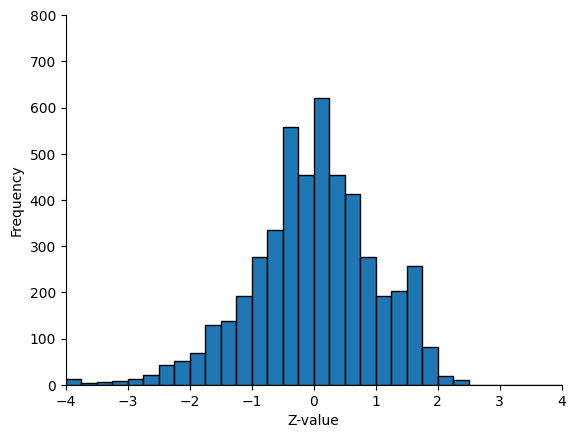

In [93]:
plt.hist(df_temp_zscore, bins=np.arange(-4, 4.25, 0.25), edgecolor='black')
plt.xlabel("Z-value")
plt.ylabel("Frequency")
plt.xlim(-4, 4)
plt.ylim(0, 800)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.show()

After standardisation, the distribution of the annual mean temperature is similar to a reduced normal distribution, the mean is 0 and the standard deviation is 1.

2. Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence
sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Use both standardized and
non-standardized values and compare results. Please state which is/are the null hypothesis of your
test(s).

In [94]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df_temp_salmo = df[['temp_ann','Salmo trutta fario']]
df_temp_salmo_clean = df_temp_salmo.dropna(subset=['temp_ann', 'Salmo trutta fario'])

print(df_temp_salmo)

      temp_ann  Salmo trutta fario
0         17.6                   0
1          9.3                   1
2         10.1                   1
3         10.1                   1
4         10.3                   1
...        ...                 ...
5006      14.9                   1
5007      15.0                   1
5008      15.0                   1
5009      12.9                   1
5010      14.8                   1

[5011 rows x 2 columns]


In [95]:
presence = df_temp_salmo_clean[df_temp_salmo_clean['Salmo trutta fario'] == 1]['temp_ann']
absence = df_temp_salmo_clean[df_temp_salmo_clean['Salmo trutta fario'] == 0]['temp_ann']

presence_zscore = stats.zscore(presence)
absence_zscore = stats.zscore(absence)

In [96]:
mean_p = presence.mean()
mean_a = absence.mean()

print(f"Mean p: {mean_p}")
print(f"Mean a: {mean_a}")

print("\nTwo-sample t test:")
print("H0: μₚ = μₐ")
print("H1: μₚ ≠ μₐ")

t_stat, p_value = stats.ttest_ind(presence, absence)
print(f"\np-value = {p_value}\n")

if p_value < 0.05:
    print(r"We reject the null hypothesis (H0) at 5% significance. There is a significant difference between the means.")
else:
    print(r"We do not reject the null hypothesis (H0). There is not enough evidence to conclude a difference between the means.")


Mean p: 12.336994219653178
Mean a: 14.693684210526316

Two-sample t test:
H0: μₚ = μₐ
H1: μₚ ≠ μₐ

p-value = 0.0

We reject the null hypothesis (H0) at 5% significance. There is a significant difference between the means.


In [97]:
print("With standardized distribution:\n")

mean_p_z = presence_zscore.mean()
mean_a_z = absence_zscore.mean()

print(f"Mean p: {mean_p_z}")
print(f"Mean a: {mean_a_z}")

print("\nTwo-sample t test:")
print("H0: μₚ = μₐ")
print("H1: μₚ ≠ μₐ")

t_stat, p_value = stats.ttest_ind(presence_zscore, absence_zscore)
print(f"\np-value = {p_value}\n")

if p_value < 0.05:
    print(r"We reject the null hypothesis (H0) at 5% significance. There is a significant difference between the means.")
else:
    print(r"We do not reject the null hypothesis (H0). There is not enough evidence to conclude a difference between the means.")


With standardized distribution:

Mean p: 6.088295457720001e-16
Mean a: 8.975276662232844e-17

Two-sample t test:
H0: μₚ = μₐ
H1: μₚ ≠ μₐ

p-value = 0.999999999999986

We do not reject the null hypothesis (H0). There is not enough evidence to conclude a difference between the means.


The non-standardised t-test shows a significant difference between the means, but after standardising the data, the t-test does not show a significant difference, because standardisation reduces the differences between the distributions, placing them both with mean 0 and standard deviation 1.

3. Test whether there are diferences in the mean elevation in the upstream catchment
(Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are
these diferences significant? Please state which is/are the null hypothesis of your test(s).

In [98]:
catchment_counts = df['Catchment_name'].value_counts()
top_8_catchments = catchment_counts.head(8).index
filtered_df = df[df['Catchment_name'].isin(top_8_catchments)]
filtered_df = filtered_df[['Elevation_mean_catch', 'Catchment_name']]
elev = filtered_df.dropna()

print(elev)


      Elevation_mean_catch Catchment_name
1              1603.519424           Tejo
2              1578.678579           Tejo
3              1553.219128           Tejo
4              1539.684999           Tejo
5              1493.914010           Tejo
...                    ...            ...
4947            704.675069           Tejo
4948            702.673201           Tejo
4949            697.730192           Tejo
4950            679.784324           Tejo
4951            678.426582           Tejo

[3976 rows x 2 columns]


The null hypothesis (H0) states that there is no significant difference in mean elevation in the upstream catchment between the two catchment sites and the alternative hypothesis (H1) states that there is.

In [100]:
tukey_result = pairwise_tukeyhsd(endog=elev['Elevation_mean_catch'], 
                                 groups=elev['Catchment_name'], 
                                 alpha=0.05)

print(tukey_result.summary())


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
  Cantabrica       Catala   50.1883 0.7208  -42.1585  142.5351  False
  Cantabrica        Douro  268.1584    0.0  190.9443  345.3726   True
  Cantabrica         Ebro  467.4299    0.0   399.797  535.0628   True
  Cantabrica Galiza-Norte -184.2794    0.0   -252.02 -116.5388   True
  Cantabrica       Guadia -168.8947    0.0 -251.7428  -86.0466   True
  Cantabrica        Minho  290.9895    0.0  223.2126  358.7663   True
  Cantabrica         Tejo  168.3227    0.0    95.179  241.4664   True
      Catala        Douro  217.9701    0.0  124.2303  311.7099   True
      Catala         Ebro  417.2415    0.0  331.2221  503.2609   True
      Catala Galiza-Norte -234.4677    0.0 -320.5718 -148.3636   True
      Catala       Guadia -219.0831    0.0 -317.5154 -120.6507   True
      Catala        

While most catchment sites have distinct mean elevations the pairs: Cantabrica and Catala, Douro and Minho, and Galiza-Norte and Guadia do not differ significantly.

4. Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

The non-normal distribution of the data can limit the conclusions of the tests carried out. In addition, the same effect can be present if the observations are not independent and identically distributed or if there are outliers in these observations.